In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.autograd import Variable
import torch.nn.functional as F

In [2]:
data = np.loadtxt('data.txt', delimiter=',')
data = data.astype('float32')

In [3]:
data = data / data.max(0)

In [4]:
x1 = data[data[:, 2] == 1]
x0 = data[data[:, 2] == 0]

In [5]:
p_x1, p_y1 = x1[:, 0], x1[:, 1]
p_x0, p_y0 = x0[:, 0], x0[:, 1]

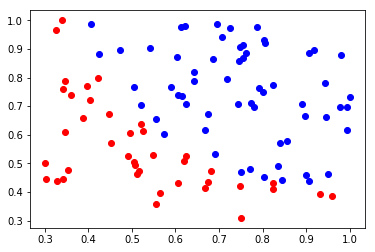

In [6]:
plt.plot(p_x1, p_y1, 'bo', label='x_1')
plt.plot(p_x0, p_y0, 'ro', label='x_0')

In [7]:
x_data = torch.from_numpy(data[:, :2]).float()
y_data = torch.from_numpy(data[:, -1]).float().unsqueeze(1)

In [8]:
print(y_data.size())

torch.Size([100, 1])


In [9]:
x_data = Variable(x_data)
y_data = Variable(y_data)

In [10]:
w = Variable(torch.randn(2, 1), requires_grad=True) 
b = Variable(torch.randn(1), requires_grad=True)

def logistic_regression(x):
    return torch.sigmoid(torch.mm(x, w) + b)

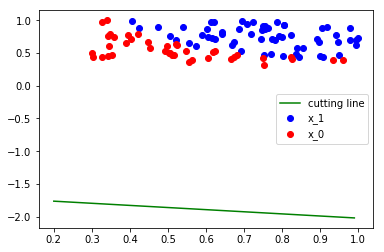

In [11]:
w0 = w[0].data[0].numpy()
w1 = w[1].data[0].numpy()
b0 = b.data.numpy()

plot_x1 = np.arange(0.2, 1, 0.01)
plot_x2 = (-b0 - w0 * plot_x1) / w1 #w0*x0 + w1*x1 + b0 = 0 是决策面

plt.plot(plot_x1, plot_x2, 'g', label='cutting line')
plt.plot(p_x1, p_y1, 'bo', label='x_1')
plt.plot(p_x0, p_y0, 'ro', label='x_0')
plt.legend(loc='best')

In [18]:
def binary_loss(y_pred, y):
    # clamp 规定上下限
    logits = (y * y_pred.clamp(1e-12).log() + (1-y) * (1-y_pred).clamp(1e-12).log()).mean()
    return -logits

In [19]:
y_pred = logistic_regression(x_data)
loss = binary_loss(y_pred, y_data)
print(loss)

tensor(0.8381, grad_fn=<NegBackward>)


In [20]:
loss.backward()

w.data -= w.grad.data * 0.1
b.data -= b.grad.data * 0.1

y_pred = logistic_regression(x_data)
loss = binary_loss(y_pred, y_data)
print(loss)

tensor(0.8282, grad_fn=<NegBackward>)


In [21]:
# nn.Parameter 默认是求梯度的, Variable 默认是不求梯度的

In [24]:
from torch import nn
w = nn.Parameter(torch.randn(2, 1))
b = nn.Parameter(torch.randn(1))

def logistic_regression(x):
    return torch.sigmoid(torch.mm(x, w) + b)

optimizer = torch.optim.SGD([w, b], lr=1.)

In [37]:
import time 
start = time.time()

for i in range(1000):
    y_pred = logistic_regression(x_data)
    loss = binary_loss(y_pred, y_data)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    mask = y_pred.ge(0.5).float()
    
    acc = (mask == y_data).sum().data / y_data.shape[0]
#     print("i", i)
    if (i  + 1) % 200 == 0:
        print('epoch: {}, loss:{:.5f}, Acc:{:5f}'.format(i+1, loss, acc))
        
during = time.time() - start

print("During Time: {:.3f} s".format(during))   
    

epoch: 200, loss:0.22093, Acc:0.000000
epoch: 400, loss:0.21913, Acc:0.000000
epoch: 600, loss:0.21757, Acc:0.000000
epoch: 800, loss:0.21622, Acc:0.000000
epoch: 1000, loss:0.21503, Acc:0.000000
During Time: 0.380 s


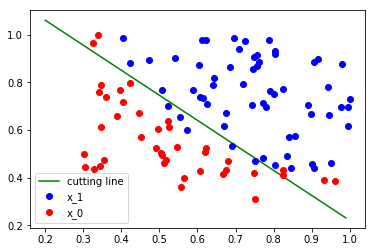

In [38]:
w0 = w[0].data[0].numpy()
w1 = w[1].data[0].numpy()
b0 = b.data.numpy()

plot_x1 = np.arange(0.2, 1, 0.01)
plot_x2 = (-b0 - w0 * plot_x1) / w1 #w0*x0 + w1*x1 + b0 = 0 是决策面

plt.plot(plot_x1, plot_x2, 'g', label='cutting line')
plt.plot(p_x1, p_y1, 'bo', label='x_1')
plt.plot(p_x0, p_y0, 'ro', label='x_0')
plt.legend(loc='best')

In [41]:
criterion = nn.BCEWithLogitsLoss()

w = nn.Parameter(torch.randn(2,1))
b = nn.Parameter(torch.randn(1))

def logistic_regression(x):
    return torch.mm(x, w) + b
optimizer = torch.optim.SGD([w, b], lr=0.1)

In [42]:
y_pred = logistic_regression(x_data)
loss =criterion(y_pred, y_data)
print(loss.data)

tensor(0.7224)


In [43]:
start = time.time()

for i in range(1000):
    y_pred = logistic_regression(x_data)
    loss = criterion(y_pred, y_data)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    mask = y_pred.ge(0.5).float()
    
    acc = (mask == y_data).sum().data / y_data.shape[0]
#     print("i", i)
    if (i  + 1) % 200 == 0:
        print('epoch: {}, loss:{:.5f}, Acc:{:5f}'.format(i+1, loss, acc))
        
during = time.time() - start

print("During Time: {:.3f} s".format(during))   

epoch: 200, loss:0.63549, Acc:0.000000
epoch: 400, loss:0.59115, Acc:0.000000
epoch: 600, loss:0.55392, Acc:0.000000
epoch: 800, loss:0.52250, Acc:0.000000
epoch: 1000, loss:0.49580, Acc:0.000000
During Time: 0.328 s
